##                                Importing the Dependies

<img src= "CardiacPictureTeam1Pycharmers.jpg" width=500, height=500>

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pywaffle

In [1]:
pip install qbstyles

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import qbstyles 
from qbstyles import mpl_style
import missingno as msno
from pywaffle import Waffle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re
from datetime import datetime, timedelta
%matplotlib inline

## Data Collection and Processing

In [28]:
df_Responsivenes=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Responsivenes')
df_Hospitalization_Discharge = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name = "Hospitalization_Discharge")
df_CardiacComplications = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name = "CardiacComplications")
df_PatientHistory = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name = "PatientHistory")
df_Labs = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name ="Labs")
df_Demography = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "Demography")
df_Patient_Prescriptions = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "Patient_Precriptions")

## Question1 How many patients were registered in each unique occupation?

In [6]:
df_Demography.groupby('occupation').size()

occupation
Officer             7
Others             89
UrbanResident    1670
farmer            198
worker             17
dtype: int64

## Question2 Divide GCS scores into slabs of 5 and count the number of patients under each band of score. Show this as any graph of your choice

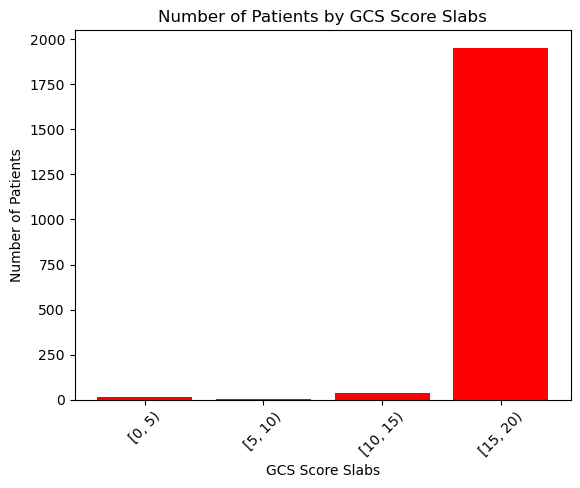

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


slabs = range(0, 21, 5)


# Create bins for the GCS scores
bins = pd.cut(df_Responsivenes['GCS'], bins=slabs, right=False, include_lowest=True)

# Count the number of patients falling within each slab
counts = bins.value_counts(sort=False)

# Plot the counts as a bar graph
plt.bar(counts.index.astype(str),counts.values,color='red')
plt.title('Number of Patients by GCS Score Slabs')
plt.xlabel('GCS Score Slabs')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
##plt.tight_layout()
plt.show()

## Question3  Add a calculated column called Discharge date into the Hospitalization_Discharge using the information already available to you

In [8]:
# Question no.3 Add a calculated column called Discharge date into the Hospitalization_Discharge using the information already available to you?
# Convert "Admission date" to datetime
df_Hospitalization_Discharge['Admission date'] = pd.to_datetime(df_Hospitalization_Discharge['Admission_date'])
# Add calculated column "Discharge date" by adding "Discharge day" to "Admission date"
df_Hospitalization_Discharge['Discharge date'] = df_Hospitalization_Discharge['Admission_date'] + pd.to_timedelta(df_Hospitalization_Discharge['dischargeDay'], unit='D')

# Display the DataFrame
df_Hospitalization_Discharge['Discharge date']

0      2017-02-04
1      2017-05-13
2      2016-11-23
3      2017-10-13
4      2019-11-22
          ...    
2003   2016-02-12
2004   2017-04-06
2005   2018-02-05
2006   2019-11-28
2007   2017-02-23
Name: Discharge date, Length: 2008, dtype: datetime64[ns]

## Question4 What percentage of patients had Biventricular heart failure?

In [11]:
#Question no 4. Count the number of patients with biventricular heart failure
num_biventricular_failure = df_CardiacComplications['type_of_heart_failure'].str.contains('both', case=False).sum()

# Count the total number of patients
total_inpatient_number = len(df_CardiacComplications)

# Calculate the percentage
percentage_biventricular_failure = (num_biventricular_failure / total_inpatient_number) * 100

# Print the result
print(f"The percentage of patients with biventricular heart failure is: {percentage_biventricular_failure:.2f}%")

The percentage of patients with biventricular heart failure is: 73.71%


## Question5 What is the ratio of patients who were responsive to pain vs responsive to sound?

In [12]:
# question 5 What is the ratio of patients who were responsive to pain vs responsive to sound?
ResponsiveToPain_count = (df_Responsivenes['consciousness'] == 'ResponsiveToPain').sum()
# Count the number of patients responsive to sound
ResponsiveToSound_count =  (df_Responsivenes['consciousness'] == 'ResponsiveToSound').sum()
# Calculate the ratio
ratio_pain_to_sound = ResponsiveToPain_count / ResponsiveToSound_count
ratio = f"{ResponsiveToPain_count}:{ResponsiveToSound_count}"

# Print the ratio
print("Ratio of patients responsive to pain vs responsive to sound:", ratio , ratio_pain_to_sound)

Ratio of patients responsive to pain vs responsive to sound: 4:19 0.21052631578947367


## Question6 What was the average age group of the patients that had an outcome of 'Alive'?

In [13]:

df_Hospitalization_Discharge=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')
filtered_df = df_Hospitalization_Discharge[df_Hospitalization_Discharge["outcome_during_hospitalization"].str.contains("Alive")]

#df_Demography=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Demography')
f = filtered_df[["inpatient_number","outcome_during_hospitalization"]].merge(df_Demography[["inpatient_number","ageCat"]],on = "inpatient_number",how = "inner") 


s = f.groupby(['outcome_during_hospitalization','ageCat']).size()
result = s.loc[s.groupby(level=0).idxmax()].reset_index().drop(0,axis=1)
print("The average age group of the patients that had more outcome of Alive are:")
print(result)

The average age group of the patients that had more outcome of Alive are:
  outcome_during_hospitalization ageCat
0                          Alive  69-79


## Question7 Visualize missing data and missing patterns from Demography table using the "MissingNo" Library.

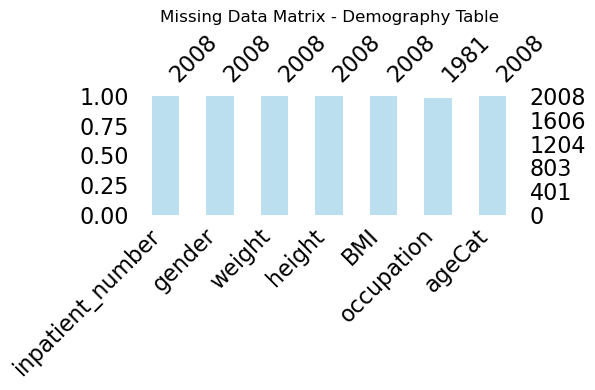

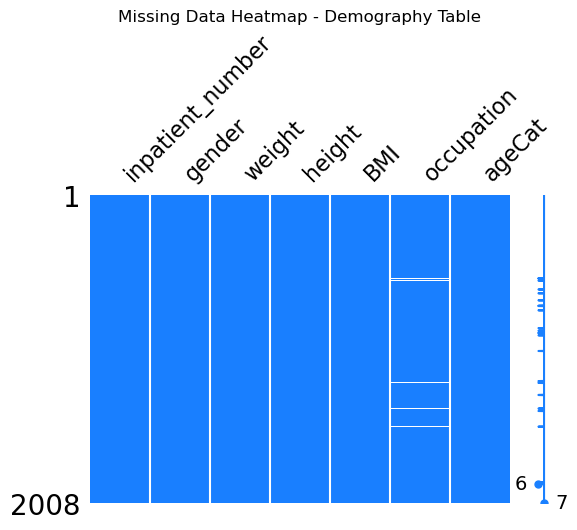

In [14]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.light_palette("skyblue", as_cmap=True)

# Visualize missing data patterns with a bar chart
msno.bar(df_Demography, figsize=(6, 4), color=cmap(0.5))  # Set color using the colormap
plt.title('Missing Data Matrix - Demography Table')  # Corrected title
plt.tight_layout()
plt.show()

# Visualize missing data patterns with a heatmap
msno.matrix(df_Demography, figsize=(6, 4), color=(0.1, 0.5, 1))  # Use RGB tuple for color
plt.title('Missing Data Heatmap - Demography Table')
plt.show()

## Question8 Create a Waffle chart to show what percentage of total deaths belong to each admission_ward?

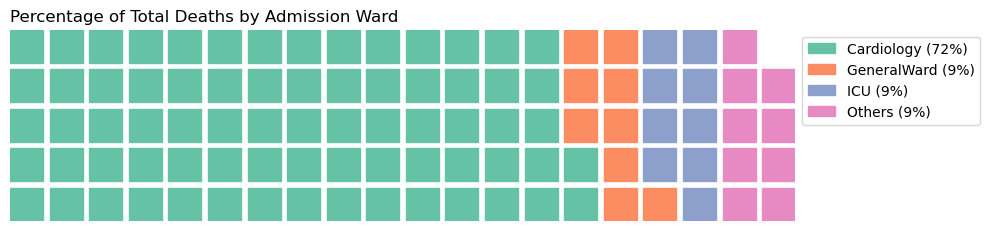

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle

dead_df = df_Hospitalization_Discharge[df_Hospitalization_Discharge['outcome_during_hospitalization'].str.contains("Dead")]
death_percentage = dead_df['admission_ward'].value_counts(normalize=True) * 100

values = {
    'Cardiology': int(death_percentage.get('Cardiology', 0)),
    'GeneralWard': int(death_percentage.get('GeneralWard', 0)),
    'ICU': int(death_percentage.get('ICU', 0)),
    'Others': int(death_percentage.get('Others', 0))
}
formatted_values = {key: f"{value}%" for key, value in values.items()}

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=values,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'labels': [f"{key} ({value})" for key, value in formatted_values.items()]},
    figsize=(10, 5)
)

plt.title('Percentage of Total Deaths by Admission Ward', loc='left')
plt.show()


## Question9 Create any 2 2-D arrays and perform matrix multiplication. Display the resulting array.

In [16]:
array1 = np.array([[11, 12,1], [13, 14,2] ,[6,7,8]])
array2 = np.array([[5, 6,2], [7, 8,3],[1,2,3]])

result_array = np.dot(array1, array2)

print(result_array)

[[140 164  61]
 [165 194  74]
 [ 87 108  57]]


## Question10  Display the percentage of missing values in each column in the table labs. Show the distribution as a bar graph

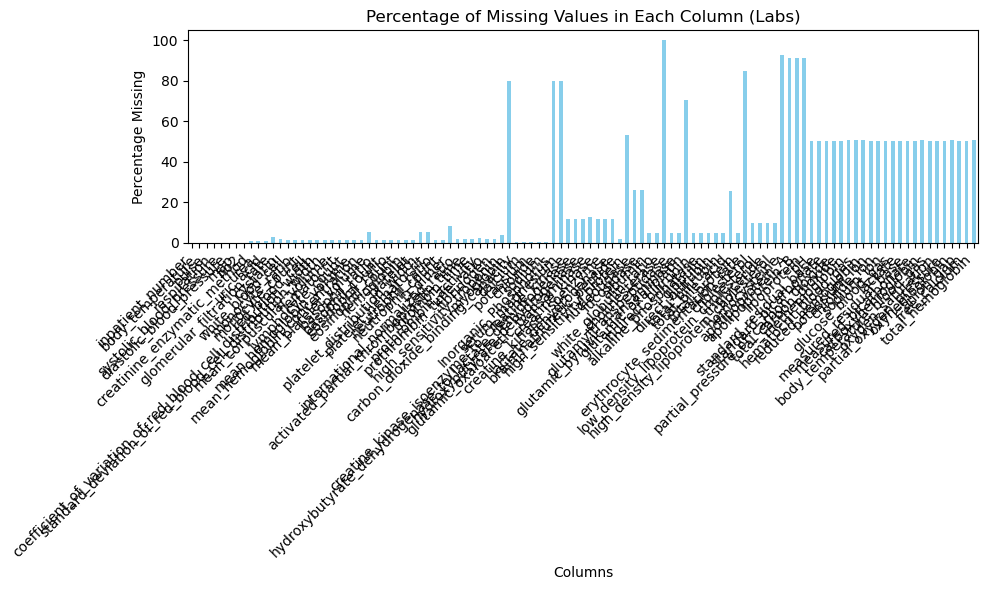

In [17]:
missing_percentages = (df_Labs.isnull().sum() / len(df_Labs)) * 100
plt.figure(figsize=(10, 6))
missing_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values in Each Column (Labs)')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Question11  A valid mobile number is a ten digit number starting with a 7,8 or 9. For every string listed, print "YES" if it is a valid
## mobile number and "NO" if it is not on separate lines. Do not print the quotes. {2,9587456281,1252478965,7397260044}

In [18]:
numbers = ['2','9587456281','1252478965','7397260044']

for number in numbers:
    if len(number) == 10 and number[0] in ['7', '8', '9'] and number.isdigit():
        print("YES")
    else:
        print("NO")

NO
YES
NO
YES


## Question12 If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit and what 
##is the MAP of most patients with this condition?

In [19]:
import pandas as pd
df = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name="CardiacComplications")
df_Labs = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name="Labs")
abnormal_diameter = df[(df['left_ventricular_end_diastolic_diameter_LV'] > 5.6) | (df['left_ventricular_end_diastolic_diameter_LV'] < 3.5)]
num_patients_outside_limit = len(abnormal_diameter)
merged_df = abnormal_diameter.merge(df_Labs, on='inpatient_number', how='inner')
most_patients_with_condition = merged_df['map'].mode()[0]
print("Number of patients with left ventricular end-diastolic diameter outside normal range:", num_patients_outside_limit)
print("MAP of most patients with this condition:", round(most_patients_with_condition, 2))

Number of patients with left ventricular end-diastolic diameter outside normal range: 1311
MAP of most patients with this condition: 96.67


## Question13 Create a bar chart between lengthofstay and body temperature, classified as: Hypothermia, within range or hyperthermia

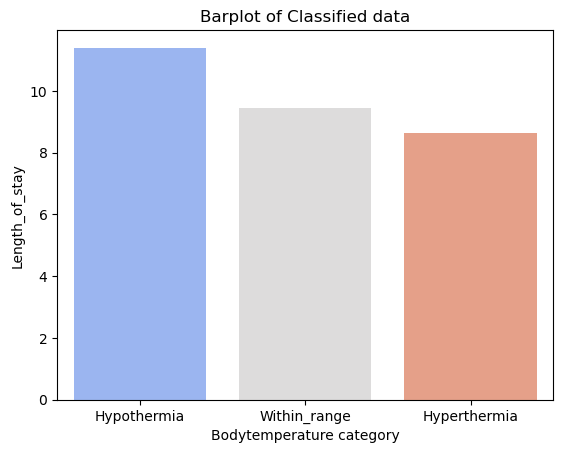

In [20]:
#df1 =  pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name="Hospitalization_Discharge")
filtered_df_Hospitalization_Discharge = df_Hospitalization_Discharge[['inpatient_number', 'dischargeDay']]

#df2 =  pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name="Labs")
filtered_df_Labs = df_Labs[['inpatient_number', 'body_temperature']]

merged_df = pd.merge(filtered_df_Hospitalization_Discharge, filtered_df_Labs, on='inpatient_number')
bins=[25, 36.0, 37.5, 45]
labels = ['Hypothermia','Within_range','Hyperthermia']
merged_df['bodytemperature'] = pd.Categorical(pd.cut(merged_df['body_temperature'], 
                                                          bins=bins,
                                                          labels=labels, right=False))

category_means = merged_df.groupby('bodytemperature',observed=True)['dischargeDay'].mean().reset_index()

sns.barplot(data=category_means, x='bodytemperature', y='dischargeDay', palette='coolwarm')
plt.title('Barplot of Classified data')
plt.xlabel('Bodytemperature category')
plt.ylabel('Length_of_stay')
plt.show()

## Question14 Find the list of patients whose DischargeDay is greater than the value given by the user

In [ ]:
i = int(input())
ls = []
for x in range(df_Hospitalization_Discharge.shape[0]):
    if(df_Hospitalization_Discharge['dischargeDay'][x]>i):
        ls.append(df_Hospitalization_Discharge['inpatient_number'][x])
ls

## Question15 Display a pie chart of number of patients in each category listed
## -death_within_28_days,-re_admission_within_28_days,-death_within_3_months ,
## -re_admission_within_3_months,-death_within_6_months,-re_admission_within_6_months,
## -return_to_emergency_department_within_6_months

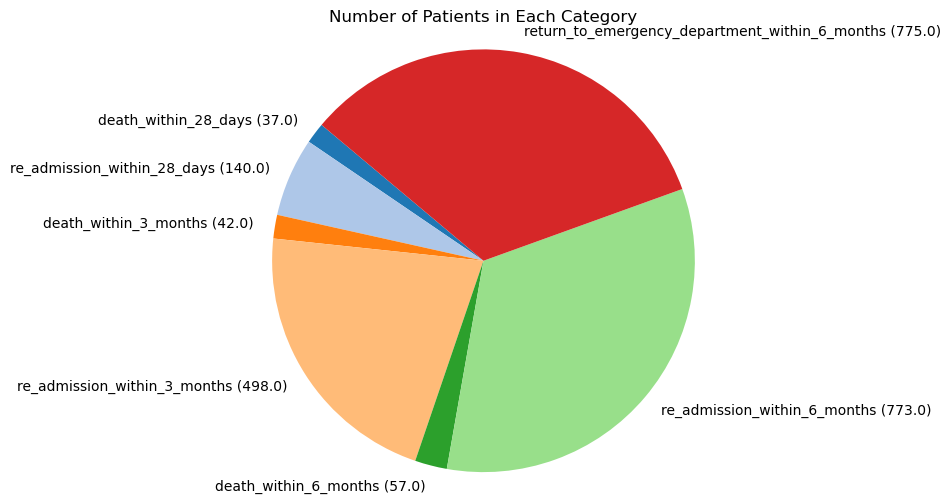

In [21]:
dfpie = df_Hospitalization_Discharge[['death_within_28_days', 're_admission_within_28_days',
                   'death_within_3_months', 're_admission_within_3_months',
                   'death_within_6_months', 're_admission_within_6_months',
                   'return_to_emergency_department_within_6_months']]
total = dfpie.sum()
colors = plt.cm.tab20.colors[:len(total)]
labels_counts = [f"{label} ({count})" for label, count in zip(total.index, total)]
plt.figure(figsize=(6, 6))
plt.pie(total, labels=labels_counts, startangle=140, colors=colors)
plt.title('Number of Patients in Each Category')
plt.axis('equal')
plt.show()


## Question16 Create a pivot table with myocardial_infarction, congestive_heart_failure,peripheral_vascular_disease as rows and average Uric Acid
## and BMI as columns, using melt functions

In [22]:
data1=df_CardiacComplications[['inpatient_number','myocardial_infarction','congestive_heart_failure','peripheral_vascular_disease']]
data2=df_Labs[['inpatient_number','uric_acid']]
data3=df_Demography[['inpatient_number','BMI']]

Mtable = pd.merge(pd.merge(data1,data2, on='inpatient_number'), data3, on='inpatient_number')
melted_df = pd.melt(Mtable, id_vars=['inpatient_number', 'uric_acid', 'BMI'],
                    value_vars=['myocardial_infarction', 'congestive_heart_failure', 'peripheral_vascular_disease'],
                    value_name='Status')
filtered_df = melted_df[melted_df['Status'] == 1]
table = filtered_df.pivot_table(index='variable', values=['uric_acid', 'BMI'], aggfunc='mean')
print(table)

                                   BMI   uric_acid
variable                                          
congestive_heart_failure     21.807617  482.398594
myocardial_infarction        21.631441  507.850000
peripheral_vascular_disease  22.736907  489.282828


## Question17 Using arrays and loops find the number of patients who were Admitted in the month of November

In [23]:
countpatient_november=df_Hospitalization_Discharge.loc[:,['inpatient_number', 'Admission_date']]
countpatient_november

,inpatient_number,Admission_date
0,857781,2017-01-24
1,743087,2017-05-05
2,866418,2016-11-18
3,775928,2017-10-02
4,810128,2019-11-17
...,...,...
2003,740689,2016-02-07
2004,734280,2017-03-29
2005,781004,2018-01-22
2006,744870,2019-11-27


In [24]:
#filtering novenber month.
month1=df_Hospitalization_Discharge['Admission_date'].dt.month
novembermonth=df_Hospitalization_Discharge[month1 == 11]['Admission_date']
print(novembermonth)
dates_array = np.array(novembermonth)
print("Number of patients admitted only in the month of november",len(dates_array))

2      2016-11-18
4      2019-11-17
10     2018-11-18
20     2018-11-28
21     2019-11-06
          ...    
1923   2018-11-10
1931   2017-11-08
1944   2019-11-23
1977   2018-11-01
2006   2019-11-27
Name: Admission_date, Length: 195, dtype: datetime64[ns]
Number of patients admitted only in the month of november 195


## Question18 Create a heatmap on any columns of your choice including at least 1 lab value

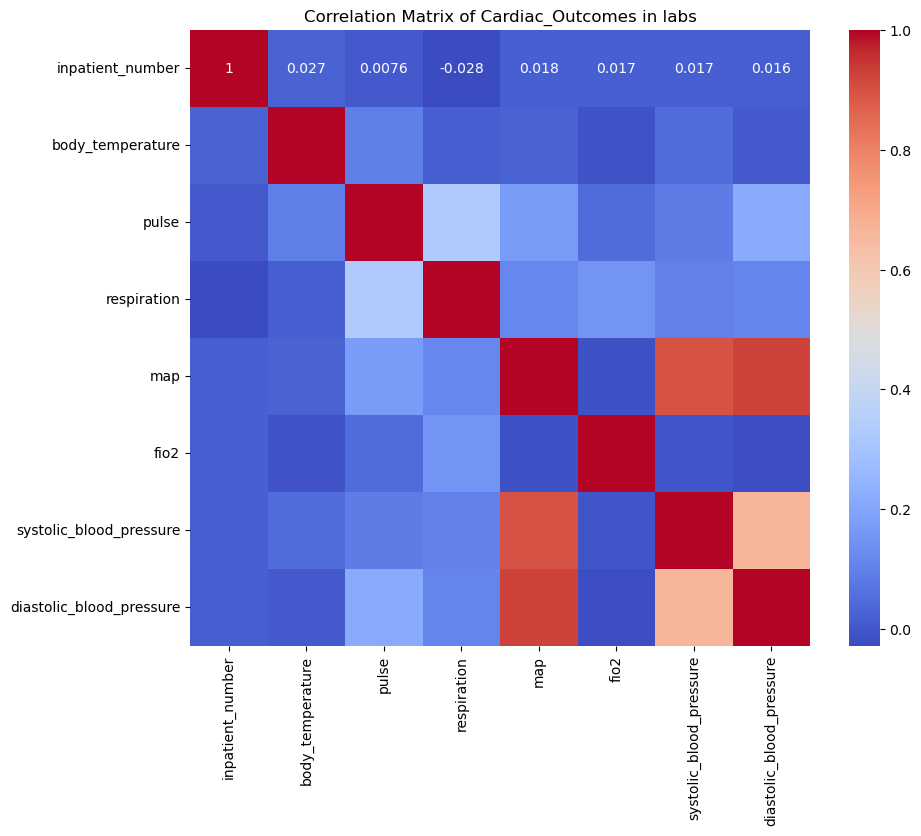

In [25]:
#ques18 Create a heatmap on any columns of your choice including at least 1 lab value
#Heatmap: Correlation Matrix.
plt.figure(figsize=(10, 8))
df1=df_Labs.loc[:,['inpatient_number', 'body_temperature','pulse','respiration','map','fio2','systolic_blood_pressure','diastolic_blood_pressure']]
correlation_matrix = df1.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Cardiac_Outcomes in labs')
plt.show()

## Question19 Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by 
## using set_hatch() method

In [26]:
#19 Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method
#removing duplicates from BMI.
bmiduplicate=df_Demography['BMI'].drop_duplicates().shape
bmiduplicate

(661,)

In [27]:
#Removing duplicates from occupation 
occuduplicate=df_Demography['occupation'].drop_duplicates().shape
occuduplicate

(6,)

Total BMI Records= 2008
Sum of BMI Values with duplicate value= 43757.126271910434
Average with duplicate value= 21.791397545772128
Total records without duplicates= (661,)
Sum of BMI Values without duplicate value= 15247.643025815602
Average without duplicates= [23.06753862]
occupation without duplicates (6,)


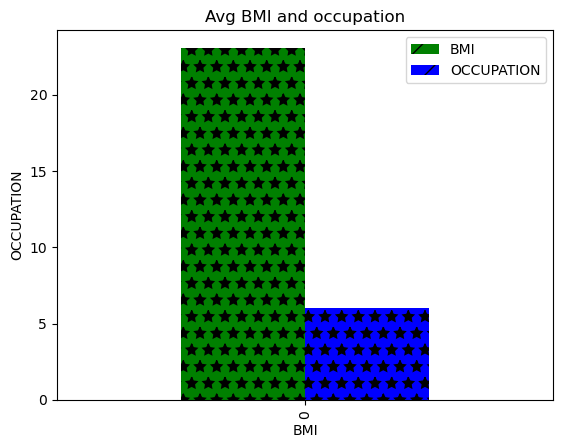

In [28]:
#finding avg bmi
#Total BMI Records
totalbmi=len(df_Demography['BMI'])
print("Total BMI Records=",totalbmi)

#Sum of BMI values with duplicates
sumbmidup=df_Demography['BMI'].sum()
print("Sum of BMI Values with duplicate value=",sumbmidup)

#Average of BMI with Duplicate
Avgwithdup=sumbmidup/totalbmi
print("Average with duplicate value=",Avgwithdup)

#Total Record Count  for bmi without duplicate
bmiduplicate=df_Demography['BMI'].drop_duplicates().shape
print("Total records without duplicates=",bmiduplicate)

#sum of BMI without duplicates
sumbmiwithoutdup=(df_Demography['BMI'].drop_duplicates()).sum()
print("Sum of BMI Values without duplicate value=",sumbmiwithoutdup)

#Average of BMI without Duplicates.
avgwithoutdup=sumbmiwithoutdup/bmiduplicate
print("Average without duplicates=",avgwithoutdup)

print("occupation without duplicates",occuduplicate)
data = {"BMI": avgwithoutdup, "OCCUPATION": occuduplicate}
pd.DataFrame(data).plot.bar(color=("green", "blue"), hatch=("/", "*"))
plt.xlabel('BMI')
plt.ylabel('OCCUPATION')
plt.title('Avg BMI and occupation')
plt.show()

## Question20 You are given three integers x,y,z representing the dimensions of a cuboid along with an integer n . 
## Print a list of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n. 
## x=1, y=1, z=2, n-3

In [29]:
# question 20 You are given three integers x,y,z representing the dimensions of a cuboid along with an integer n . 
#Print a list of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n. 
#x=1, y=1, z=2, n-3
if __name__ == '__main__':
    x = int(input())
    y = int(input())
    z = int(input())
    n = int(input())
    print(list([i,j,k] for i in range(x+1) for j in range(y+1) for k in range(z+1)  if i+j+k !=n))


 1
 1
 2
 3


[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 2]]


## Question21 Given the names and grades for each student in a class of students, store them in a nested list and print the name(s) of
## any student(s) having the second lowest grade.
## python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]

In [31]:
#21   Given the names and grades for each student in a class of students, store them in a nested list and print the name(s) of any 
#      student(s) having the second lowest grade.
#      Input   :python_students = 5 then give these names and grades[['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]
if __name__ == '__main__':
    n = int(input())
    list1 = []
    list2 = []        

    for i in range(0,n):
        name = input()
        score = float(input())
        list1.append([name,score])
        list2.append(score)


list1.sort()
list2.sort()
m = min(list2)
list2.remove(m)
m2 = min(list2)

for i in range(len(list1)):
    for j in range(len(list1[i])):
        if list1[i][j] == m2:
            print(list1[i][0])

 5
 Harry
 37.21
 Berry
 37.21
 Tina
 37.2
 Akriti
 41
 Harsh
 39


Berry
Harry


## Question22 Which patient was on the most number of prescribed drugs? What was his age and outcome?

In [32]:
#displaying all the patients patient number with value counts from largest to smallest count
counta=pd.Series(df_Patient_Prescriptions['inpatient_number']).value_counts()
print(counta)

inpatient_number
777204    16
867885    15
746487    15
766722    15
800659    15
          ..
796480     1
822437     1
829624     1
869886     1
753570     1
Name: count, Length: 2009, dtype: int64


In [33]:
# the first row has largest,to display only frst row
print(counta.iloc[[0]])

inpatient_number
777204    16
Name: count, dtype: int64


In [34]:
# patient was on the most number of prescribed drugs? What was his age and outcome?(final solution)
df_Demography.loc[df_Demography['inpatient_number']==777204]

,inpatient_number,gender,weight,height,BMI,occupation,ageCat
724,777204,Male,45.0,1.55,18.730489,UrbanResident,79-89


## Question23 How many patients were prescribed Digoxin?

In [35]:
x=len(df_Patient_Prescriptions)
drugname=df_Patient_Prescriptions['Drug_name']
digoxin=df_Patient_Prescriptions[drugname == 'Digoxin tablet']
lengthdia=len(digoxin)
print(f'{lengthdia} Patients were prescribed digoxin out of total prescribed count {x}')

999 Patients were prescribed digoxin out of total prescribed count 15370


## Question24 What columns indicate a prescence of anemia? Create a severity score for anemia and prove or disprove a correlation to Length of stay

## Question25 Using GCS score, how many patients are considered to be in a coma?

In [36]:
#To find unique values in GCS Column
df_Responsivenes['GCS'].unique()

array([15, 11, 13, 12,  3, 10,  6,  7, 14,  4], dtype=int64)

In [37]:
#response[response["GCS"]==4].count()["inpatient_number"]
print(f'There are {df_Responsivenes[df_Responsivenes["GCS"]<=4].count()["inpatient_number"]} patients are considered to be in a coma based on GCS value')

There are 14 patients are considered to be in a coma based on GCS value


## Question26  Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?

In [21]:
df_Demography['age'] = df_Demography['ageCat'].str.split(pat='-')
#print(demog['age'])
for row in range(len(df_Demography)):
    ageStartRange = df_Demography['age'][row][0]
    ageEndRange = df_Demography['age'][row][1]
    Random_age=np.random.randint(ageStartRange,ageEndRange)
    df_Demography.iloc[row,7] = Random_age
df_Demography


,inpatient_number,gender,weight,height,BMI,occupation,ageCat,age
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79,77
1,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79,69
2,866418,Male,70.0,1.70,24.221453,farmer,59-69,59
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79,73
4,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79,76
...,...,...,...,...,...,...,...,...
2003,740689,Female,35.0,1.50,15.555556,Others,79-89,81
2004,734280,Female,50.0,1.55,20.811655,UrbanResident,79-89,81
2005,781004,Male,75.0,1.70,25.951557,UrbanResident,39-49,44
2006,744870,Male,40.0,1.50,17.777778,UrbanResident,49-59,57


In [39]:
#To Find Average age of Patients
Sumofage=df_Demography['age'].sum()
Averageage=Sumofage/len(df_Demography)
print(f"{Averageage} is the average age of patients")

73.88794820717132 is the average age of patients


## Question27 Using the age column generated in Q.26, calculate year of birth for each patient

In [22]:
#To add new column called "yearofbirth" for demography Table.
currentyear=datetime.now().year
df_Demography['yearofbirth']=currentyear-df_Demography['age']
df_Demography


,inpatient_number,gender,weight,height,BMI,occupation,ageCat,age,yearofbirth
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79,77,1947
1,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79,69,1955
2,866418,Male,70.0,1.70,24.221453,farmer,59-69,59,1965
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79,73,1951
4,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79,76,1948
...,...,...,...,...,...,...,...,...,...
2003,740689,Female,35.0,1.50,15.555556,Others,79-89,81,1943
2004,734280,Female,50.0,1.55,20.811655,UrbanResident,79-89,81,1943
2005,781004,Male,75.0,1.70,25.951557,UrbanResident,39-49,44,1980
2006,744870,Male,40.0,1.50,17.777778,UrbanResident,49-59,57,1967


## Question28 Store patient number and gender in a dictionary as a pair of values. Show the first 10 values

In [41]:
#Selecting first 10 rows of patientid and gender from Demography and creating as a dataframe

dictdemog=pd.DataFrame(df_Demography[['inpatient_number','gender']].head(10))
#To display dataframe  rows and columns
dictdemog

,inpatient_number,gender
0,857781,Male
1,743087,Female
2,866418,Male
3,775928,Male
4,810128,Female
5,823318,Female
6,844094,Male
7,787530,Female
8,795420,Female
9,829801,Female


In [42]:
#Converting into dictionary  and showing in key value pair for ten rows
demography_dict=dictdemog.to_dict()
demography_dict

{'inpatient_number': {0: 857781,
  1: 743087,
  2: 866418,
  3: 775928,
  4: 810128,
  5: 823318,
  6: 844094,
  7: 787530,
  8: 795420,
  9: 829801},
 'gender': {0: 'Male',
  1: 'Female',
  2: 'Male',
  3: 'Male',
  4: 'Female',
  5: 'Female',
  6: 'Male',
  7: 'Female',
  8: 'Female',
  9: 'Female'}}

## Question29 What percentage of those in a coma also have diabetes?

In [43]:
#29   What percentage of those in a coma also have diabetes?From question 25(14 patients are there in coma
#to display  14 patient number with coma and converting to dataframe
comapatient=pd.DataFrame(df_Responsivenes[df_Responsivenes["GCS"]<=4]["inpatient_number"])
comapatient

,inpatient_number
379,731871
626,781960
854,815140
1028,790433
1058,834443
1111,730841
1184,797195
1207,854580
1252,765343
1295,835988


In [44]:
#to check patient id in comapatient and response Dataframe
#merging dataframe for response and comapatient
#pd.merge used for merging
response_comapatient=pd.merge(df_PatientHistory,comapatient)
response_comapatient.columns

Index(['inpatient_number', 'cerebrovascular_disease', 'dementia',
       'Chronic_obstructive_pulmonary_disease', 'connective_tissue_disease',
       'peptic_ulcer_disease', 'diabetes',
       'moderate_to_severe_chronic_kidney_disease', 'hemiplegia', 'leukemia',
       'malignant_lymphoma', 'solid_tumor', 'liver_disease', 'AIDS',
       'CCI_score', 'type_II_respiratory_failure', 'acute_renal_failure'],
      dtype='object')

In [45]:
#after merging displaying coloumns and rows
response_comapatient

,inpatient_number,cerebrovascular_disease,dementia,Chronic_obstructive_pulmonary_disease,connective_tissue_disease,peptic_ulcer_disease,diabetes,moderate_to_severe_chronic_kidney_disease,hemiplegia,leukemia,malignant_lymphoma,solid_tumor,liver_disease,AIDS,CCI_score,type_II_respiratory_failure,acute_renal_failure
0,731871,0,1,0,0,1.0,0,0.0,0,0,0,0,0.0,0,3.0,NonTypeII,0
1,781960,0,1,0,0,0.0,0,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,0
2,815140,0,0,0,1,0.0,0,0.0,0,0,0,0,0.0,0,2.0,TypeII,0
3,790433,1,0,0,0,0.0,1,1.0,0,0,0,0,1.0,0,5.0,NonTypeII,0
4,834443,1,0,0,0,0.0,0,1.0,0,0,0,0,0.0,0,4.0,NonTypeII,0
5,730841,1,0,0,0,0.0,1,1.0,0,0,0,0,0.0,0,4.0,NonTypeII,0
6,797195,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,1.0,NonTypeII,0
7,854580,0,0,1,0,0.0,0,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,0
8,765343,0,0,0,0,0.0,0,1.0,0,0,0,0,0.0,0,2.0,NonTypeII,0
9,835988,0,0,0,0,0.0,0,1.0,0,0,0,0,0.0,0,2.0,NonTypeII,0


In [46]:
#To find counts of diabetic 
response_comapatient.value_counts('diabetes')

diabetes
0    12
1     2
Name: count, dtype: int64

In [47]:
#finding percentage of coma patient having diabetics also
Average_count_diabetics=(2/12)*100
print("percentage of coma patient with diabetics ",Average_count_diabetics,"%")

percentage of coma patient with diabetics  16.666666666666664 %


## Question30 Identify any columns relating to echocardiography and create a severity score for cardiac function. 
## Compare this outcome and show average severity score for each outcome

## Question31 Group the days to re-admission into bins and count how many patients were in each bin

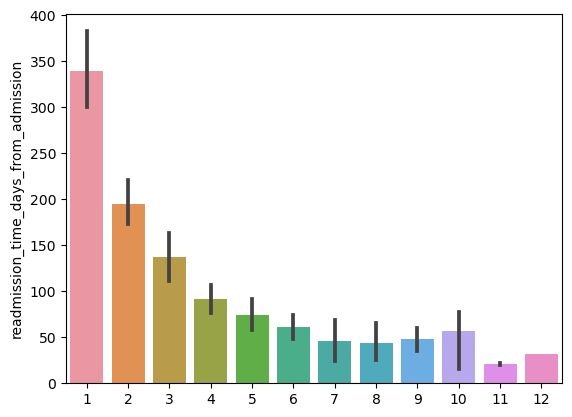

In [48]:
graph = df_Hospitalization_Discharge.groupby(['readmission_time_days_from_admission'])['inpatient_number'].nunique().sort_values(ascending=False)
sns.barplot(y = graph.index, x = graph.values)
plt.show()

## Question32Combine admission_ward & admission_way and count the patients under the new group. Create a pie chart and explode the biggest wedge

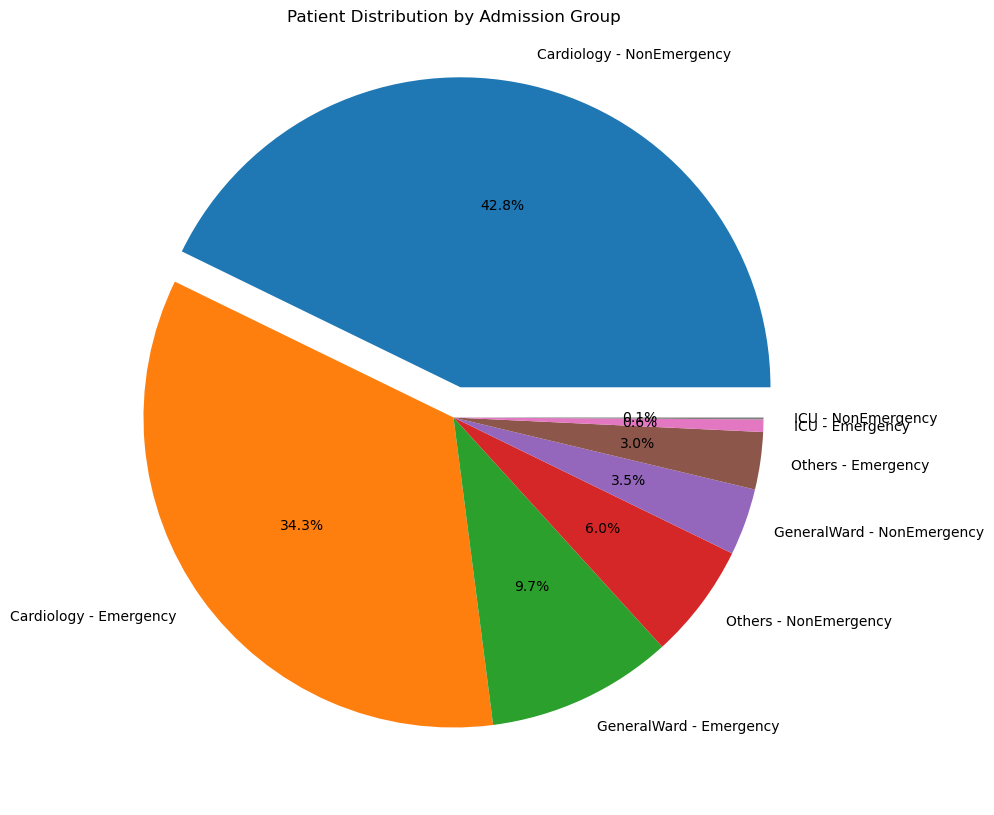

In [49]:
#question32 Combine admission_ward & admission_way and count the patients under the new group. Create a pie chart and explode the biggest wedge
df_hosdis = pd.DataFrame(df_Hospitalization_Discharge)

# Combine admission_ward and admission_way into a new column
df_hosdis['admission_group'] = df_hosdis['admission_ward'] + ' - ' + df_hosdis['admission_way']

# Count patients in each admission group
group_counts = df_hosdis['admission_group'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 14))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%',explode=(0.1, 0, 0, 0,0,0,0,0))  # Explode the biggest wedge
plt.title('Patient Distribution by Admission Group')
plt.show()


## Question33 Retrieve the row with minimum white_blood_cell count using sorting technique.

In [10]:
pd.set_option('display.max_columns', None)

result = df_Labs.sort_values("white_blood_cell")

print(result.head(1))

     inpatient_number  body_temperature  pulse  respiration  \
865            746068              37.1     71           20   

     systolic_blood_pressure  diastolic_blood_pressure    map  fio2  \
865                      130                        88  102.0    21   

     creatinine_enzymatic_method  urea  uric_acid  glomerular_filtration_rate  \
865                         88.8  7.26      379.0                       50.86   

     cystatin  white_blood_cell  monocyte_ratio  monocyte_count  \
865      1.51              1.66           0.048            0.08   

     red_blood_cell  \
865             2.4   

     coefficient_of_variation_of_red_blood_cell_distribution_width  \
865                                               17.0               

     standard_deviation_of_red_blood_cell_distribution_width  \
865                                               71.3         

     mean_corpuscular_volume  hematocrit  lymphocyte_count  \
865                    119.2       0.286             

## Question34 get the last letter of discharge_department of patients using RegEX

In [11]:
df = pd.DataFrame()

#regular expression pattern to retrieve the last letter

last_letter = r'.*(\w)$'

df['inpatient_number'] = df_Hospitalization_Discharge['inpatient_number']

df['dept_last_letter'] = df_Hospitalization_Discharge['discharge_department'].astype(str).str.extract(last_letter)

print(df.to_string())

      inpatient_number dept_last_letter
0               857781                y
1               743087                y
2               866418                y
3               775928                y
4               810128                y
5               823318                y
6               844094                y
7               787530                y
8               795420                y
9               829801                y
10              807741                y
11              748109                y
12              802296                y
13              744167                y
14              780534                y
15              852562                y
16              759947                y
17              825016                y
18              820101                y
19              729522                s
20              764082                y
21              765801                y
22              868777                d
23              821261                y


## Question35 find the way to reverse string for given input (eg: input : This hackathon is about cardiac outcomes: outcomes cardiac about is hackathon This)

In [12]:
user_input = input("Enter string for reversal:")
reversed_string = user_input[::-1]
print("Reversed string is: " + reversed_string)

Enter string for reversal:This hackathon is about cardiac outcomes
Reversed string is: semoctuo caidrac tuoba si nohtakcah sihT


## Question36 Use the QB style library to create any multidimensional arrays.Create a figure object called fig using plt.figure() **
## ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
## ** Plot (x,y) on that axes and set the labels.

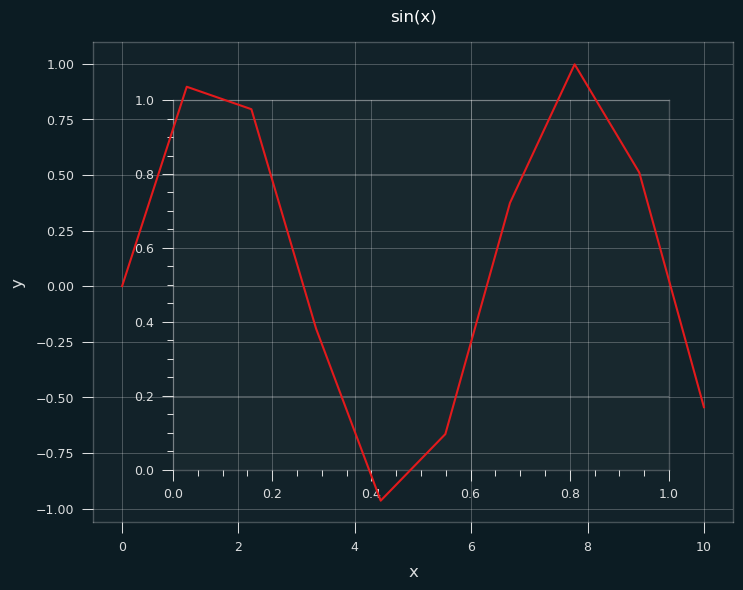

In [13]:
def plot(dark):
    mpl_style(dark)
    x = np.linspace(0, 10, 10)
    y = np.sin(x)
    fig = plt.figure()
    ax= fig.add_axes([0,0,1,1])
    ax.plot(x,y)
    ax.set_title('sin(x)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()
    
plot(dark=True)

## Question37 Using dischargeDay values print even if it even number and odd if it odd number

In [14]:
for i,row in df_Hospitalization_Discharge.iterrows():
    patient_num = row['inpatient_number']
    discharge_day = row['dischargeDay']
    if discharge_day % 2 == 0:
        print(f"Patient: {patient_num}- Discharge day {discharge_day} is even.")
    else:
        print(f"Patient: {patient_num}- Discharge day {discharge_day} is odd.")

Patient: 857781- Discharge day 11 is odd.
Patient: 743087- Discharge day 8 is even.
Patient: 866418- Discharge day 5 is odd.
Patient: 775928- Discharge day 11 is odd.
Patient: 810128- Discharge day 5 is odd.
Patient: 823318- Discharge day 6 is even.
Patient: 844094- Discharge day 10 is even.
Patient: 787530- Discharge day 27 is odd.
Patient: 795420- Discharge day 20 is even.
Patient: 829801- Discharge day 4 is even.
Patient: 807741- Discharge day 9 is odd.
Patient: 748109- Discharge day 9 is odd.
Patient: 802296- Discharge day 11 is odd.
Patient: 744167- Discharge day 22 is even.
Patient: 780534- Discharge day 8 is even.
Patient: 852562- Discharge day 3 is odd.
Patient: 759947- Discharge day 16 is even.
Patient: 825016- Discharge day 14 is even.
Patient: 820101- Discharge day 7 is odd.
Patient: 729522- Discharge day 10 is even.
Patient: 764082- Discharge day 5 is odd.
Patient: 765801- Discharge day 11 is odd.
Patient: 868777- Discharge day 7 is odd.
Patient: 821261- Discharge day 9 is 

## Question38 find the length of Tuple for any given input (Hint: Input a string from user )

In [15]:
user_input = input("Enter string :")
user_tuple = tuple(user_input)
print("Output tuple:", user_tuple)
print("Length of entered tuple:", len(user_tuple))

Enter string :Numpy Ninja Python Hackathon
Output tuple: ('N', 'u', 'm', 'p', 'y', ' ', 'N', 'i', 'n', 'j', 'a', ' ', 'P', 'y', 't', 'h', 'o', 'n', ' ', 'H', 'a', 'c', 'k', 'a', 't', 'h', 'o', 'n')
Length of entered tuple: 28


## Question39 Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

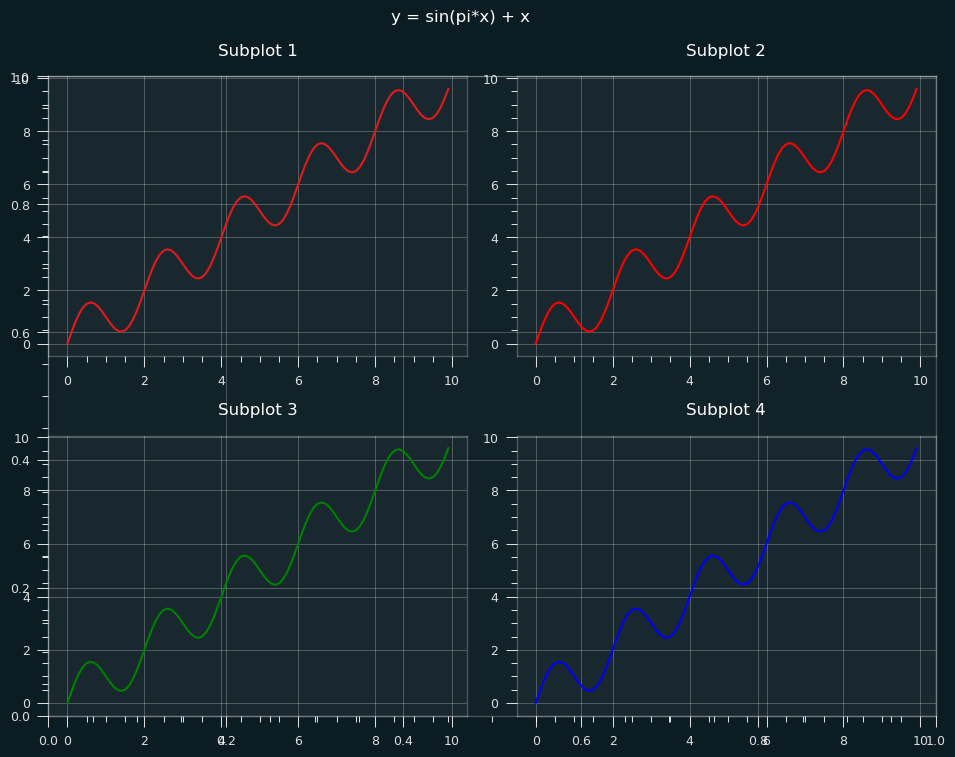

In [16]:
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(x, y)
axs[0, 0].set_title('Subplot 1')

axs[0, 1].plot(x, y, 'r')
axs[0, 1].set_title('Subplot 2')

axs[1, 0].plot(x, y, 'g')
axs[1, 0].set_title('Subplot 3')

axs[1, 1].plot(x, y, 'b')
axs[1, 1].set_title('Subplot 4')

fig.suptitle('y = sin(pi*x) + x')
plt.tight_layout()
plt.show()

## Question40 Select 25 different random values between 200 to 800.

In [17]:
random.sample(range(200, 800), 25)

[478,
 300,
 590,
 455,
 342,
 416,
 786,
 591,
 746,
 426,
 324,
 376,
 598,
 575,
 208,
 207,
 581,
 701,
 678,
 705,
 441,
 286,
 751,
 419,
 325]

## Question41 Plot the time series of Admission dates with count of patients. The X-Axis should be for every 5 months

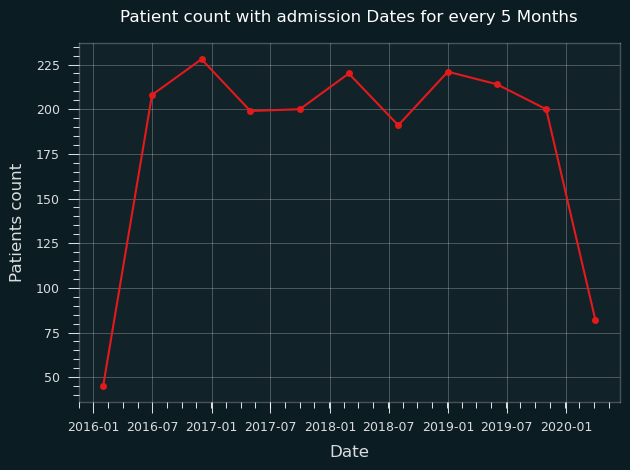

In [18]:
df = pd.DataFrame()

df_Hospitalization_Discharge['Admission_date'] = pd.to_datetime(df_Hospitalization_Discharge['Admission_date'])

patients_per_month = df_Hospitalization_Discharge.groupby(pd.Grouper(key='Admission_date', freq='M')).size()

patients_per_5months = patients_per_month.resample('5M').sum()

plt.plot(patients_per_5months.index, patients_per_5months.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Patients count')
plt.title('Patient count with admission Dates for every 5 Months')
plt.grid(True)
plt.tight_layout()
plt.show()

## Question42 np.arange(1,21).reshape(4,5), find array slicing to get the elements 1,2,8,19. 
## When the value is less than 9, print as 0,else print 1

In [19]:
array = np.arange(1,21).reshape(4,5)

array_slice = array[0, 0], array[0, 1], array[1, 2], array[3, 3]

print(array_slice)

for i in array_slice:
    if i < 9:
        print(f"{i} :0")
    else:
        print(f"{i} :1")

(1, 2, 8, 19)
1 :0
2 :0
8 :0
19 :1


## Question43 Give Distribution chart of max Killip_grade

## Question44 Based on Q26 and 27 display all demographic details of patients who are born in year 1945

In [23]:
df_patients_1945 = df_Demography[df_Demography['yearofbirth'] == 1945]
print("Patients born in 1945:")
df_patients_1945

Patients born in 1945:


,inpatient_number,gender,weight,height,BMI,occupation,ageCat,age,yearofbirth
58,794078,Male,65.0,1.65,23.875115,UrbanResident,79-89,79,1945
72,821564,Male,44.0,1.56,18.080210,UrbanResident,79-89,79,1945
125,804100,Female,45.0,1.52,19.477147,UrbanResident,79-89,79,1945
152,791071,Female,50.0,1.58,20.028842,UrbanResident,79-89,79,1945
156,830545,Female,39.0,1.53,16.660259,UrbanResident,79-89,79,1945
183,775922,Female,73.0,1.57,29.615806,UrbanResident,79-89,79,1945
246,814224,Male,40.0,1.40,20.408163,UrbanResident,79-89,79,1945
281,758056,Male,51.0,1.67,18.286780,UrbanResident,79-89,79,1945
330,822272,Female,50.0,1.55,20.811655,UrbanResident,79-89,79,1945
338,731623,Female,58.0,1.45,27.586207,UrbanResident,79-89,79,1945


## Question45 Create a dataframe with date and time as columns, where the values are the admission time

In [24]:
df_admission = pd.DataFrame([])
len_of_df = len(df_Hospitalization_Discharge ['Admission_date'])
df_admission['admission_date'] = df_Hospitalization_Discharge ['Admission_date']

df_admission['admission_time'] = '00:00:00'

#df['admission_time'] = pd.to_timedelta(np.random.randint(0, 24*60*60, len_of_df), unit='s')

#df_admission['admission_time'] = df['admission_time'].dt.components['hours'].astype(str) + ':' + \
#                          df['admission_time'].dt.components['minutes'].astype(str) + ':' + \
#                          df['admission_time'].dt.components['seconds'].astype(str)

df_admission

,admission_date,admission_time
0,2017-01-24,00:00:00
1,2017-05-05,00:00:00
2,2016-11-18,00:00:00
3,2017-10-02,00:00:00
4,2019-11-17,00:00:00
...,...,...
2003,2016-02-07,00:00:00
2004,2017-03-29,00:00:00
2005,2018-01-22,00:00:00
2006,2019-11-27,00:00:00


## Question46 Convert occupation into numeric by Label encoding

In [29]:
df = pd.DataFrame()

label_encoder = preprocessing.LabelEncoder()

df['occupation_name'] = df_Demography['occupation']

df['inpatient_number'] = df_Demography['inpatient_number']

df['occupation'] = df_Demography['occupation'] = label_encoder.fit_transform(df_Demography['occupation']) 

df_Demography['occupation'].unique

print(df.to_string())

     occupation_name  inpatient_number  occupation
0      UrbanResident            857781           2
1      UrbanResident            743087           2
2             farmer            866418           3
3      UrbanResident            775928           2
4      UrbanResident            810128           2
5      UrbanResident            823318           2
6      UrbanResident            844094           2
7      UrbanResident            787530           2
8      UrbanResident            795420           2
9      UrbanResident            829801           2
10            worker            807741           4
11     UrbanResident            748109           2
12     UrbanResident            802296           2
13            farmer            744167           3
14     UrbanResident            780534           2
15     UrbanResident            852562           2
16     UrbanResident            759947           2
17     UrbanResident            825016           2
18     UrbanResident           

## Question47 Generate a 3x3 Array using Random values between 1to 9 and Fix the values and position in Next Run.

In [30]:
np.random.seed(1)  

values = np.arange(1, 10)

np.random.shuffle(values)

random_array = values.reshape((3, 3))

print(random_array)

[[9 3 7]
 [8 2 1]
 [5 4 6]]


## Question48 Using loops, create a multiplication table for the number 7

In [31]:
multiplier = 7
row = int(input("Enter number of rows for 7 multiplication table:"))

for i in range(1, row+1):
    product = multiplier * i
    print(f"{multiplier} * {i} = {product}") 

Enter number of rows for 7 multiplication table:20
7 * 1 = 7
7 * 2 = 14
7 * 3 = 21
7 * 4 = 28
7 * 5 = 35
7 * 6 = 42
7 * 7 = 49
7 * 8 = 56
7 * 9 = 63
7 * 10 = 70
7 * 11 = 77
7 * 12 = 84
7 * 13 = 91
7 * 14 = 98
7 * 15 = 105
7 * 16 = 112
7 * 17 = 119
7 * 18 = 126
7 * 19 = 133
7 * 20 = 140


## Question49 Connect to sql and write a query to find all patients who have a gender of 'Male' ( Attach screenshots for this question)